In [1]:
import labtools
from labtools import is_consistent

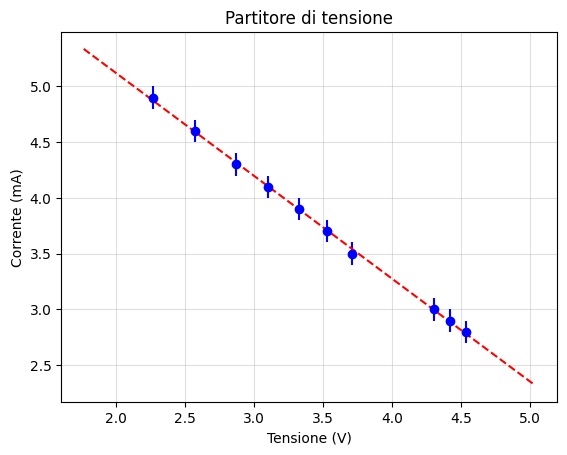

In [2]:
esperimento1 = labtools.analysis("parte1.csv", x="Tensione", y="Corrente", deg=1, x_err = "Err T", y_err = "Err C" , title = "Partitore di tensione", xlabel = "Tensione (V)", ylabel = "Corrente (mA)")

In [41]:
esperimento1.fig.savefig("partitore_singolo.png")

In [3]:
from uncertainties import ufloat
expected_value = ufloat(15, 0.01)/2

In [13]:
rt = esperimento1.parametri
rt = -1/rt[0]
str(rt*1000)

'1083+/-10'

In [5]:
vt = esperimento1.x_intersect()
str(vt)

'7.55+/-0.04'

In [6]:
labtools.is_consistent(vt, expected_value)

False

In [4]:
float(esperimento1.chi_red)

0.042834690073691666

In [3]:
float(esperimento1.chi_red)

0.042834690073691666

In [4]:
esperimento1.chi_test(0.05)

True

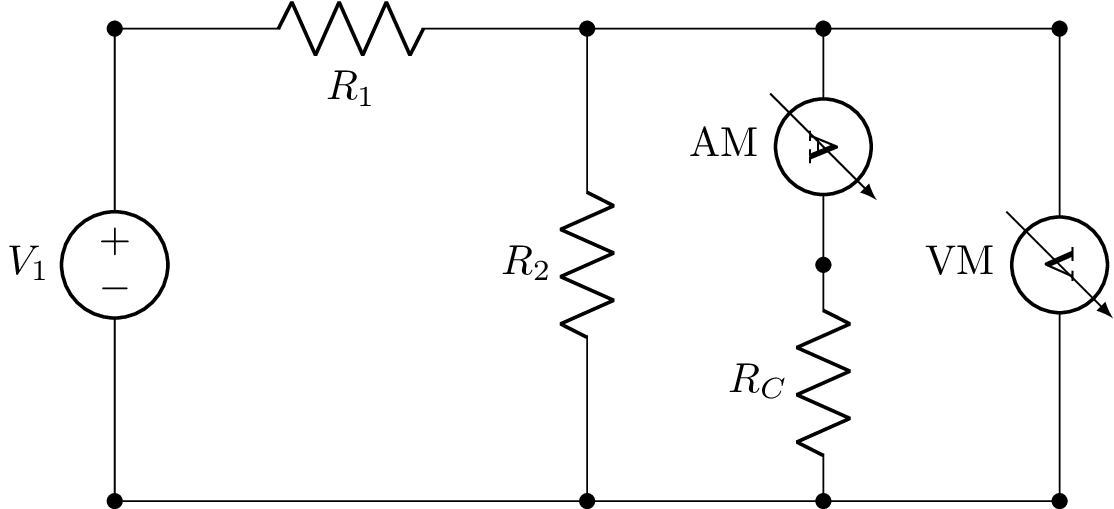

In [3]:
from lcapy import Circuit

primo_circ = Circuit("""
V1 1 0 ; down=2
R1 1 2 ; right=2
R2 2 8 ; down=2
W 2 3; right=1
W 3 4; right=1
AM 3 6; down=1
RC 6 7; down=1
W 7 8; left=1
W 8 0; left=2
VM 4 5; down=2
W 5 7; left=1

"""
)
#ccp.draw("primo.sch", scale=1, label_nodes=False)
primo_circ.draw(scale=1, label_nodes=False)

In [19]:
primo_circ.R2.V

15/2

In [23]:
vth = primo_circ.thevenin(2,3)
vth.Z.evaluate()

In [15]:
secondo_circ = Circuit("""
V1 1 0 ; down=2
R1 1 2 ; right=2
R2 2 3; down=2
R3 2 4 ; right=2
R4 4 5; down=2
W 5 0; left=4
W 4 6; right=1
RC 6 10; down=1
AM 10 7; down=1
W 6 8 ; right=1
VM 8 9; down=2
W 9 0; left=6
"""
)
secondo_circ.draw("secondo_circ.pgf", scale=1, label_nodes=False)

In [25]:
a = secondo_circ.thevenin(4,5)

In [26]:
a.Z.evaluate()

In [30]:
a.V.evaluate()

3.043702929426962

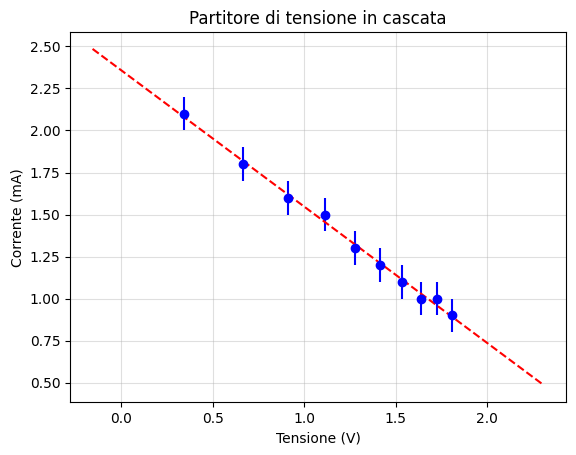

In [2]:
esperimento2 = labtools.analysis("parte2.csv", x="Tensione", y="Corrente", deg=1, x_err = "Err T", y_err = "Err C" , title = "Partitore di tensione in cascata", xlabel = "Tensione (V)", ylabel = "Corrente (mA)")

In [31]:
str(esperimento2.x_intersect())

'2.91+/-0.04'

In [32]:
rt2 = -1/esperimento2.parametri[0]
str(rt2*1000)

'1235+/-30'

In [3]:
esperimento2.fig.savefig("partitore_doppio.png")

In [6]:
esperimento2.chi_red

np.float64(0.0796272375064726)